<a href="https://colab.research.google.com/github/suuuuwimmer/study/blob/master/DataPreprocessingInMarKet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [54]:
import numpy as np
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

파이썬 **튜플(tuple)**은 리스트와 매우 비슷하다. 원소에 순서가 있지만 한 번 만들어진 튜플은 수정할 수 없다. 그러므로 함수의 매개변수로써 자주 사용한다.

In [55]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [56]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [57]:
fish_target=np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

**train_test_split()함수**는 전달되는 리스트나 배열을 비율에 맞게 훈련 세트와 테스트 세트로 나눠준다. \
cf) 알아서 섞어주기도

In [58]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [59]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [60]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [61]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [62]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [63]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [64]:
print(kn.predict([[25,150]]))

[0.]


[25,150]은 도미로 분류되어야하는데 빙어로 분류됨\
이렇게 큰 빙어가 있는건지, 모델이 잘못 분류한건지 알아보자

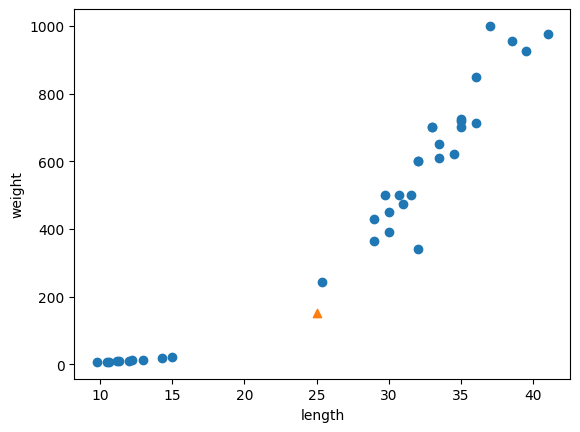

In [65]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

새로운 샘플은 marker 매개변수를 **'^'로 지정해서 삼각형으로 나타내게 했음**

In [66]:
distances, indexes = kn.kneighbors([[25,150]])

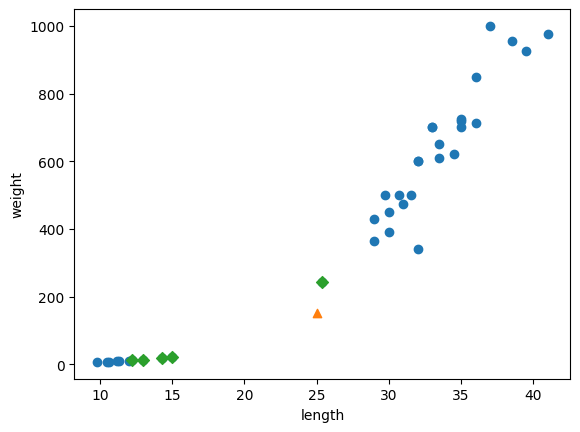

In [67]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

위 그래프에서 문제의 도미는 가까운 다섯개의 데이터들은 1 도미 4 빙어이기 때문에 빙어로 판정된 것이었음

In [68]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [69]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [70]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


x축과 y축의 비율이 다르기 때문에 그래프에 보이는 것과 달리 문제의 도미가 빙어에 더 가까웠던 것이다. x축과 y축의 비율을 조정해보자

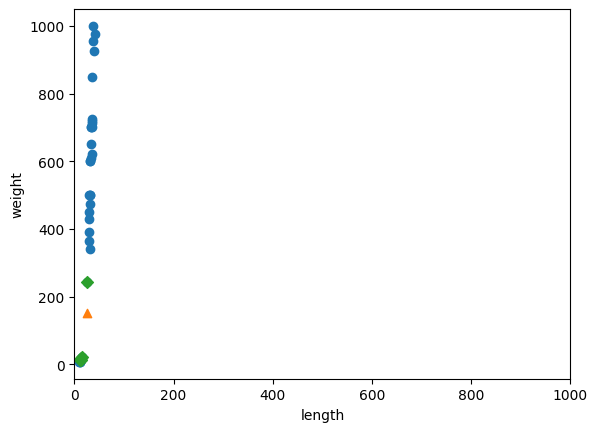

In [71]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

비율에 맞추면 거의 수직선과 비슷한 그래프를 얻게 된다.\
그러므로 x축의 값과 y축의 값의 스케일을 다르게 맞추면 데이터의 불균형을 맞출 수 있을것이다.\
이처럼 샘플값들을 일정한 기준으로 맞춰주는 것을 **데이터 전처리**라고 한다.

가장 널리 사용하는 전처리 방법 중에는 **표준점수**라는 것이 있다. \
각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져있는지를 나타내 실제 특성값의 크기와 상관없이 동일한 조건으로 비교할 수 있는 것이다.\
cf) 표준 편차는 데이터가 분산된 정도를 나타내는 것, 표준 점수는 원점에서 몇 표준편차만큼 떨어져있는지를 나타내는 것이다.

In [72]:
mean = np.mean(train_input,axis=0) #평균
std = np.std(train_input, axis=0) #표준편차

In [73]:
print(mean,std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [74]:
train_scaled=(train_input-mean)/std

train_input의 모든 행에서 mean의 두 평균값을 빼준다. 그 다음 std에 있는 두 표준편차를 다시 모든 행에 적용한다. 이 넘파이의 기능을 **브로드캐스팅(broadcasting)**이라 한다.\
브로드캐스팅은 넘파이 배열 사이에서만 사용 가능하다.

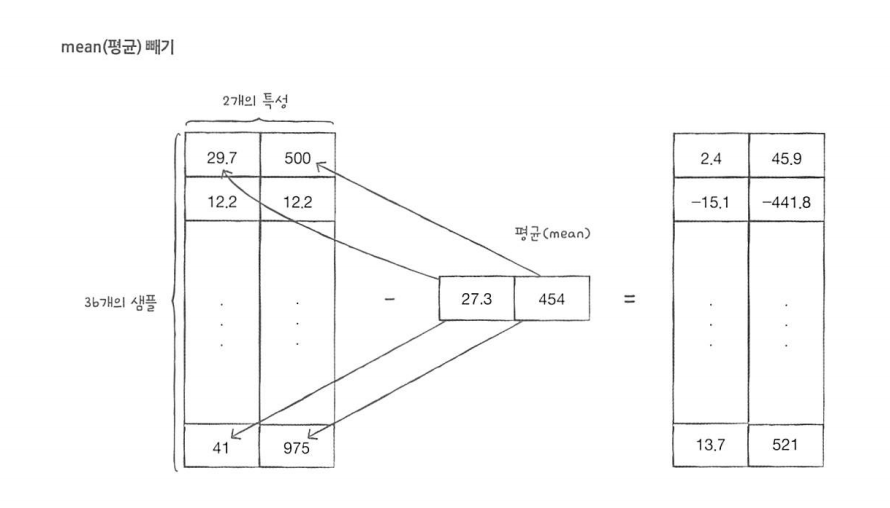

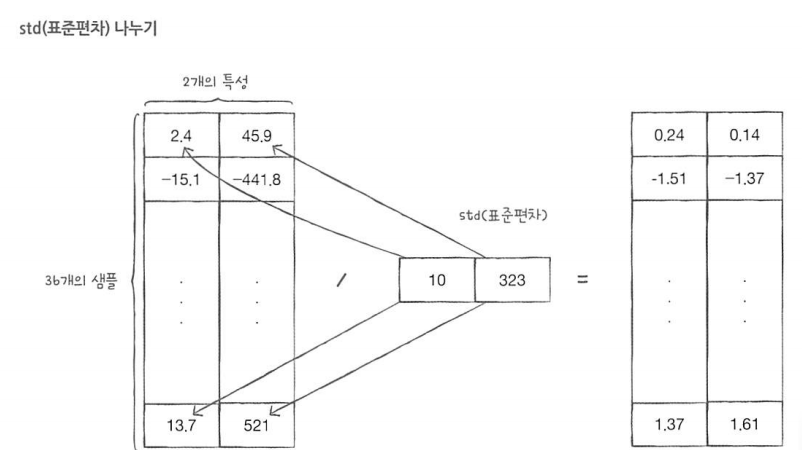

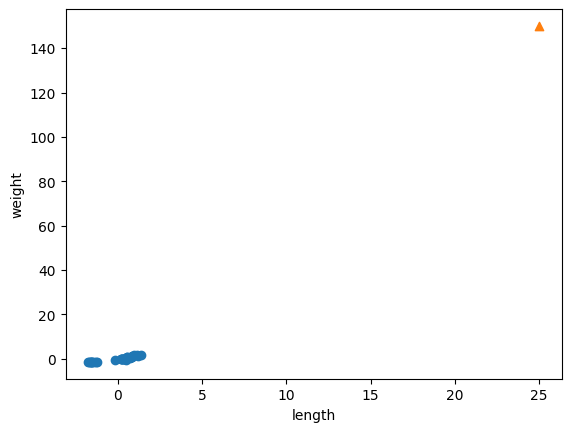

In [75]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

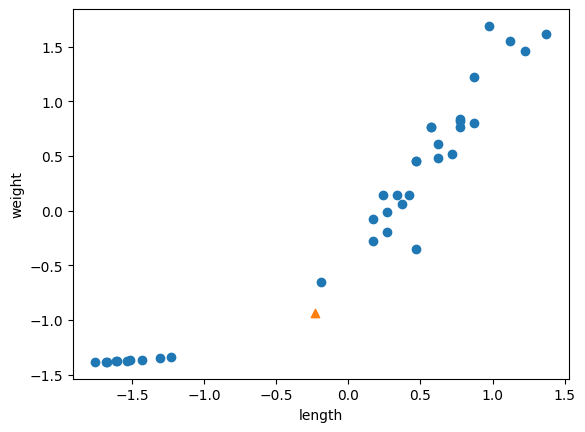

In [76]:
new = ([25,150]-mean)/std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [77]:
kn.fit(train_scaled, train_target)
test_scaled=(test_input-mean)/std
kn.score(test_scaled, test_target)

1.0

In [79]:
print(kn.predict([new]))

[1.]


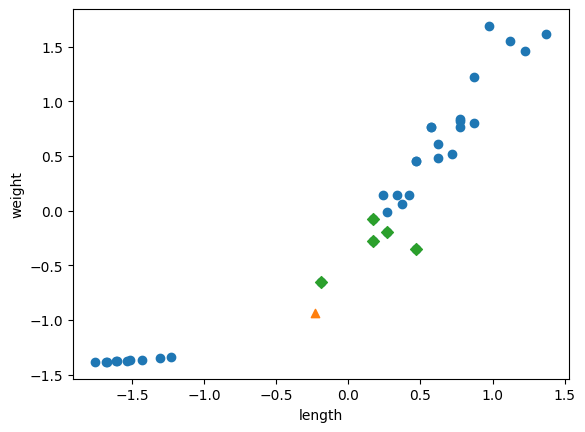

In [83]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()